In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# CSV 파일 로드
df = pd.read_csv('/content/drive/MyDrive/계통한계가격과 수도권 자급률 연구/MetroConcentration.csv')

# ADF 테스트 함수
def adf_test(series, name):
    result = adfuller(series)
    print(f"\n▶ {name}")
    print(f"ADF Statistic : {result[0]:.4f}")
    print(f"p-value       : {result[1]:.4f}")
    print("Result        :", "정상" if result[1] < 0.05 else "비정상")

# 검정할 컬럼 목록
for col in ["SMP", "LNG price", "SudoEnegrySelf"]:
    adf_test(df[col], col)


▶ SMP
ADF Statistic : 1.3582
p-value       : 0.9969
Result        : 비정상

▶ LNG price
ADF Statistic : -2.3806
p-value       : 0.1473
Result        : 비정상

▶ SudoEnegrySelf
ADF Statistic : -2.5665
p-value       : 0.1001
Result        : 비정상


In [7]:
import statsmodels.api as sm

# CSV 파일 로드
df = pd.read_csv('/content/drive/MyDrive/계통한계가격과 수도권 자급률 연구/MetroConcentration.csv')

y = df["SMP"]
X = df[["LNG price", "SudoEnegrySelf"]]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
residuals = model.resid

# ADF 검정 (추세 고려 가능)
result = adfuller(residuals, regression='c')  # c=상수항, ct=상수+추세
print(f"\n▶ Residuals")
print(f"ADF Statistic : {result[0]:.4f}")
print(f"p-value       : {result[1]:.4f}")
print("Result        :", "정상" if result[1] < 0.05 else "비정상")


▶ Residuals
ADF Statistic : -3.1011
p-value       : 0.0265
Result        : 정상


In [10]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import scipy.stats as stats
import matplotlib.font_manager as fm
from statsmodels.stats.stattools import durbin_watson

# 나눔 고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq > /dev/null

fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

# CSV 파일 로드
df = pd.read_csv('/content/drive/MyDrive/계통한계가격과 수도권 자급률 연구/MetroConcentration.csv')

# 데이터 확인
df

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


,Year,SMP,LNG price,SudoEnegrySelf
0,2023,167.00,180.01,0.4894
1,2022,196.04,204.72,0.4760
2,2021,93.98,95.54,0.4845
3,2020,68.52,71.83,0.4554
4,2019,90.09,93.38,0.4455
5,2018,94.64,97.87,0.4389
6,2017,81.39,85.85,0.3890
7,2016,76.91,80.22,0.3718
8,2015,101.54,106.75,0.3048
9,2014,141.78,145.54,0.2009


In [11]:
# 종속변수 (Y)
Y = df['SMP']
# 설명 및 통제변수 (X), 상수항(intercept) 추가
X = df[['SudoEnegrySelf', 'LNG price', 'Year']]
X = sm.add_constant(X)

# OLS 회귀분석 실행
model = sm.OLS(Y, X)
results = model.fit()

# 잔차 변수 정의
residuals = results.resid

# 분석 결과 요약 출력 (참고용)
print(results.summary())
print("\n" + "="*50 + "\n")

                            OLS Regression Results                            
Dep. Variable:                    SMP   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     302.1
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           3.32e-16
Time:                        12:39:47   Log-Likelihood:                -72.883
No. Observations:                  23   AIC:                             153.8
Df Residuals:                      19   BIC:                             158.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2861.4858   1037.505     -2.

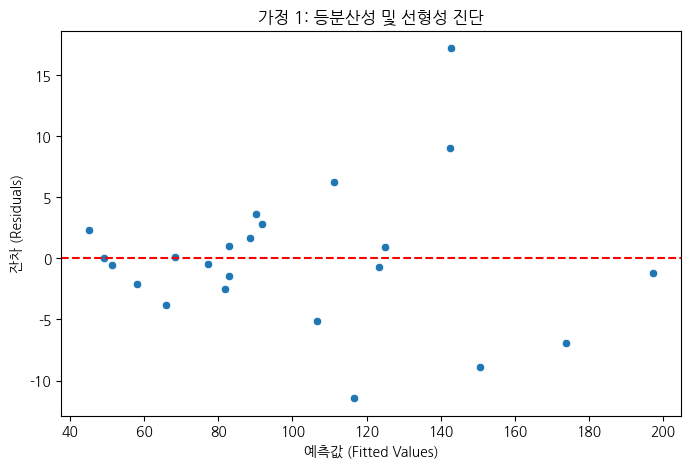


--- [등분산성] ---
Breusch-Pagan 검정 결과: 통계량=6.4769, p-value=0.0906


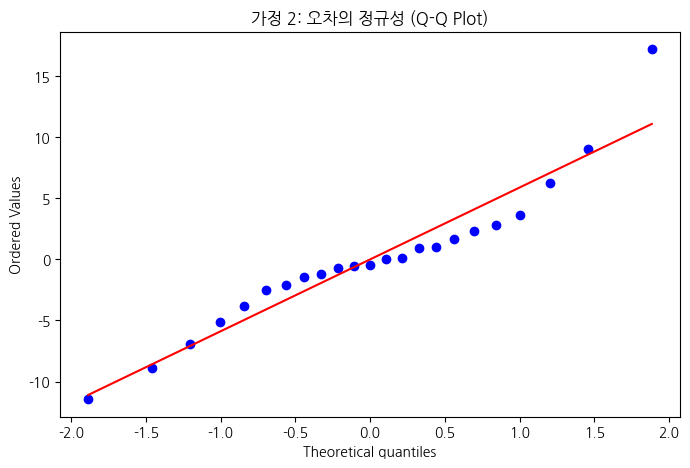


--- [오차의 정규성] ---
Shapiro-Wilk 검정 결과: 통계량=0.9322, p-value=0.1221

--- [오차의 독립성 (자기상관)] ---
Durbin-Watson 통계량: 1.6714

--- [다중공선성 (VIF)] ---
   VIF Factor        features
0   617709.33           const
1        4.84  SudoEnegrySelf
2        2.11       LNG price
3        6.84            Year


In [12]:
### 가정 1: 등분산성 (Homoscedasticity)
predicted_values = results.predict()
plt.figure(figsize=(8, 5))
sns.scatterplot(x=predicted_values, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('가정 1: 등분산성 및 선형성 진단')
plt.xlabel('예측값 (Fitted Values)')
plt.ylabel('잔차 (Residuals)')
plt.show()

print("\n--- [등분산성] ---")
# Breusch-Pagan 검정 (p-value > 0.05 이면 등분산성 만족)
bp_test = sm.stats.het_breuschpagan(residuals, results.model.exog)
print(f"Breusch-Pagan 검정 결과: 통계량={bp_test[0]:.4f}, p-value={bp_test[1]:.4f}")

### 가정 2: 오차의 정규성 (Normality of Residuals)
plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('가정 2: 오차의 정규성 (Q-Q Plot)')
plt.show()

shapiro_test = stats.shapiro(residuals)
print(f"\n--- [오차의 정규성] ---")
print(f"Shapiro-Wilk 검정 결과: 통계량={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

### 가정 3: 오차의 독립성 (자기상관, Autocorrelation)
dw_statistic = durbin_watson(residuals)
print(f"\n--- [오차의 독립성 (자기상관)] ---")
print(f"Durbin-Watson 통계량: {dw_statistic:.4f}")

### 진단 4: 다중공선성 (Multicollinearity)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print("\n--- [다중공선성 (VIF)] ---")
print(vif.round(2))